In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-processing-data/10card.png
/kaggle/input/image-processing-data/big10.png
/kaggle/input/image-processing-data/object.png
/kaggle/input/image-processing-data/Finding/1.jpg
/kaggle/input/image-processing-data/Finding/3.jpg
/kaggle/input/image-processing-data/Finding/2.jpg
/kaggle/input/image-processing-data/Counting/rabbit_template.jpeg
/kaggle/input/image-processing-data/Counting/rabbit.jpeg
/kaggle/input/image-processing-data/Counting/cat.jpg
/kaggle/input/image-processing-data/Counting/mouse.jpg
/kaggle/input/image-processing-data/Counting/pair_boot.jpg
/kaggle/input/image-processing-data/Counting/rabbit2.png
/kaggle/input/image-data/sav_000001.mp4
/kaggle/input/image-data/view-home-city-tu-cong-vien.jpg
/kaggle/input/image-processing/hdr3.jpg
/kaggle/input/image-processing/high-exposure.jpg
/kaggle/input/image-processing/hdr2.jpeg
/kaggle/input/image-processing/hdr4.jpg
/kaggle/input/image-processing/Manarola.jpg
/kaggle/input/image-processing/hdr2.jpg
/kaggle/inpu

In [2]:
!pip install ultralytics
!pip install opencv-python
!pip install supervision==0.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 19.4 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO 
MODEL_NAME = "yolov8x.pt"
model = YOLO(MODEL_NAME)
model.fuse()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:01<00:00, 132MB/s]


YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [4]:
from supervision.video.source import get_video_frames_generator
VIDEO_SRC = "//kaggle/input/image-processing/vehicle_video.mp4"
generator = get_video_frames_generator(VIDEO_SRC)
iterator = iter(generator)
frame = next(iterator)


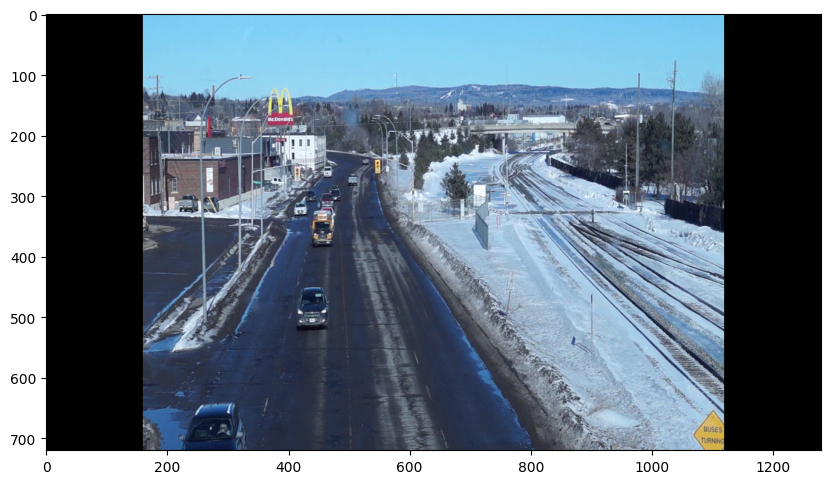

In [5]:
from supervision.notebook.utils import show_frame_in_notebook
show_frame_in_notebook(frame)

In [6]:
from supervision.draw.color import ColorPalette
from supervision.tools.detections import Detections, BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette())
frame = next(iterator)

result = model(frame)[0]
detection = Detections(xyxy=result.boxes.xyxy.numpy(),
                    confidence=result.boxes.conf.numpy(),
                    class_id=result.boxes.cls.numpy().astype(int))
label = [
    f"{class_id, } {confidence:0.2f}"
    for _, confidence, class_id, track_id in detection 
]
frame_show = box_annotator.annotate(frame=frame, detections=detection, labels=label) 


0: 384x640 1 person, 7 cars, 1 truck, 2 traffic lights, 2086.5ms
Speed: 7.9ms preprocess, 2086.5ms inference, 19.0ms postprocess per image at shape (1, 3, 384, 640)


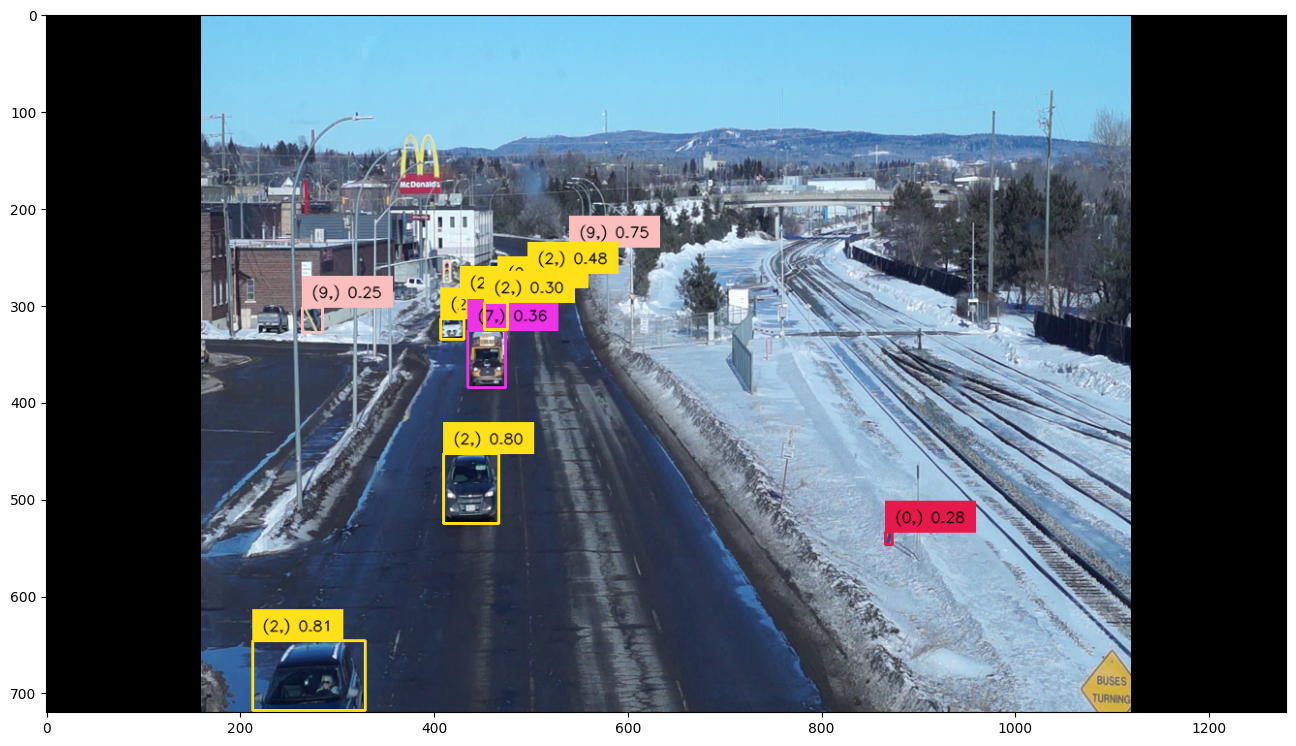

In [7]:
show_frame_in_notebook(frame_show, (16, 16))

In [8]:
DICT_OBJECT = model.model.names



0: 384x640 1 person, 9 cars, 2 trucks, 1 traffic light, 1898.7ms
Speed: 28.6ms preprocess, 1898.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


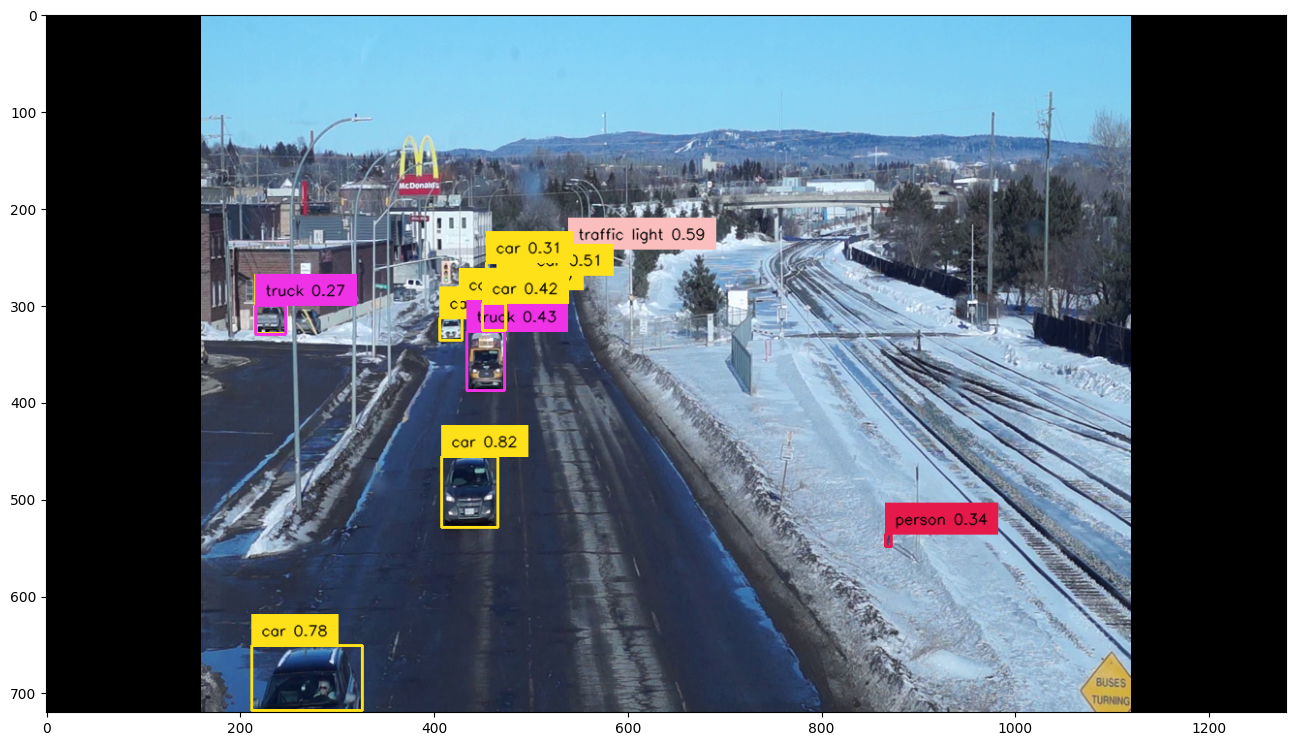

In [9]:
frame = next(iterator)
result = model(frame)[0]
detection = Detections(xyxy=result.boxes.xyxy.numpy(),
                    confidence=result.boxes.conf.numpy(),
                    class_id=result.boxes.cls.numpy().astype(int))
label = [
    f"{DICT_OBJECT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, track_id in detection 
]
frame_with_name = box_annotator.annotate(frame=frame, detections=detection, labels=label) 
show_frame_in_notebook(frame_with_name, (16, 16))


0: 384x640 9 cars, 2 trucks, 1 traffic light, 1936.4ms
Speed: 2.8ms preprocess, 1936.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


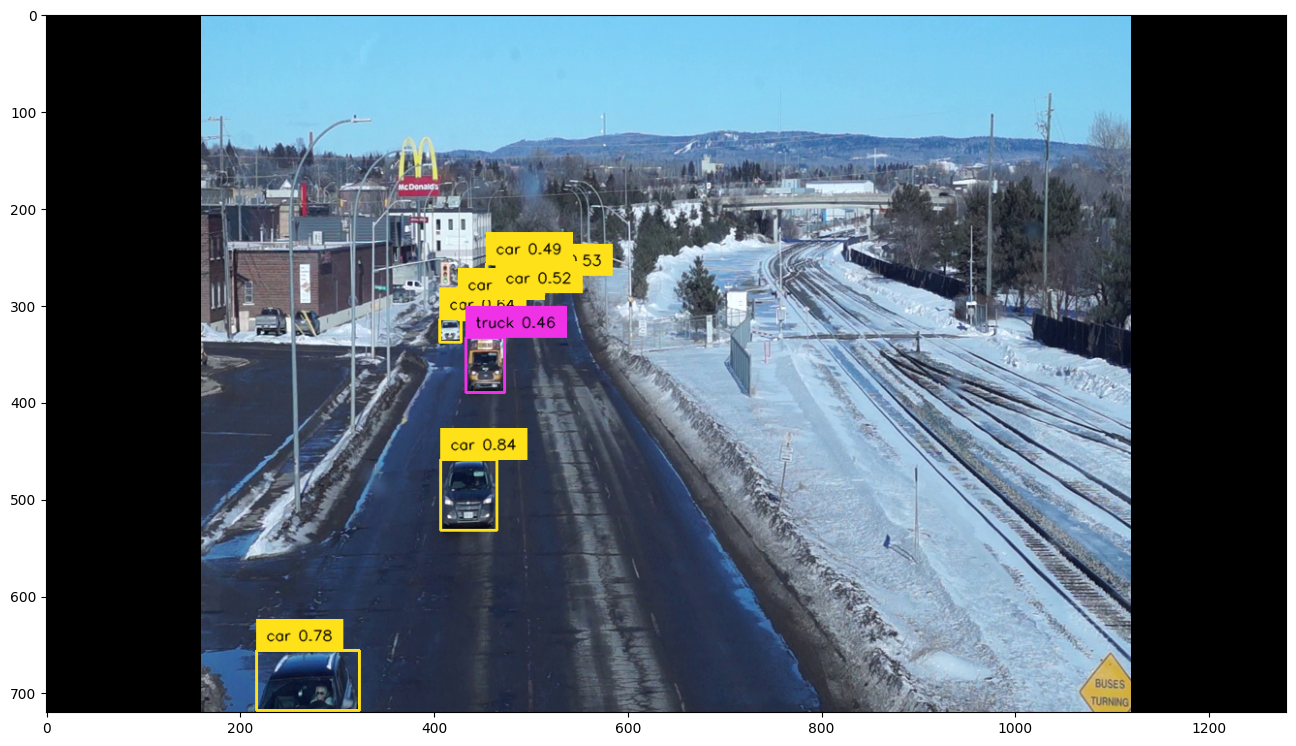

In [10]:

threshold = 0.4 
frame = next(iterator)
result = model(frame)[0]
mask_filter = result.boxes.conf.numpy() > threshold
detection = Detections(xyxy=result.boxes.xyxy.numpy()[mask_filter],
                    confidence=result.boxes.conf.numpy()[mask_filter],
                    class_id=result.boxes.cls.numpy().astype(int)[mask_filter])
label = [
    f"{DICT_OBJECT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, track_id in detection if confidence > threshold
]

frame_with_name_threshold = box_annotator.annotate(frame=frame, detections=detection, labels=label) 
show_frame_in_notebook(frame_with_name_threshold, (16, 16))


0: 640x640 1 skis, 3191.8ms
Speed: 3.6ms preprocess, 3191.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


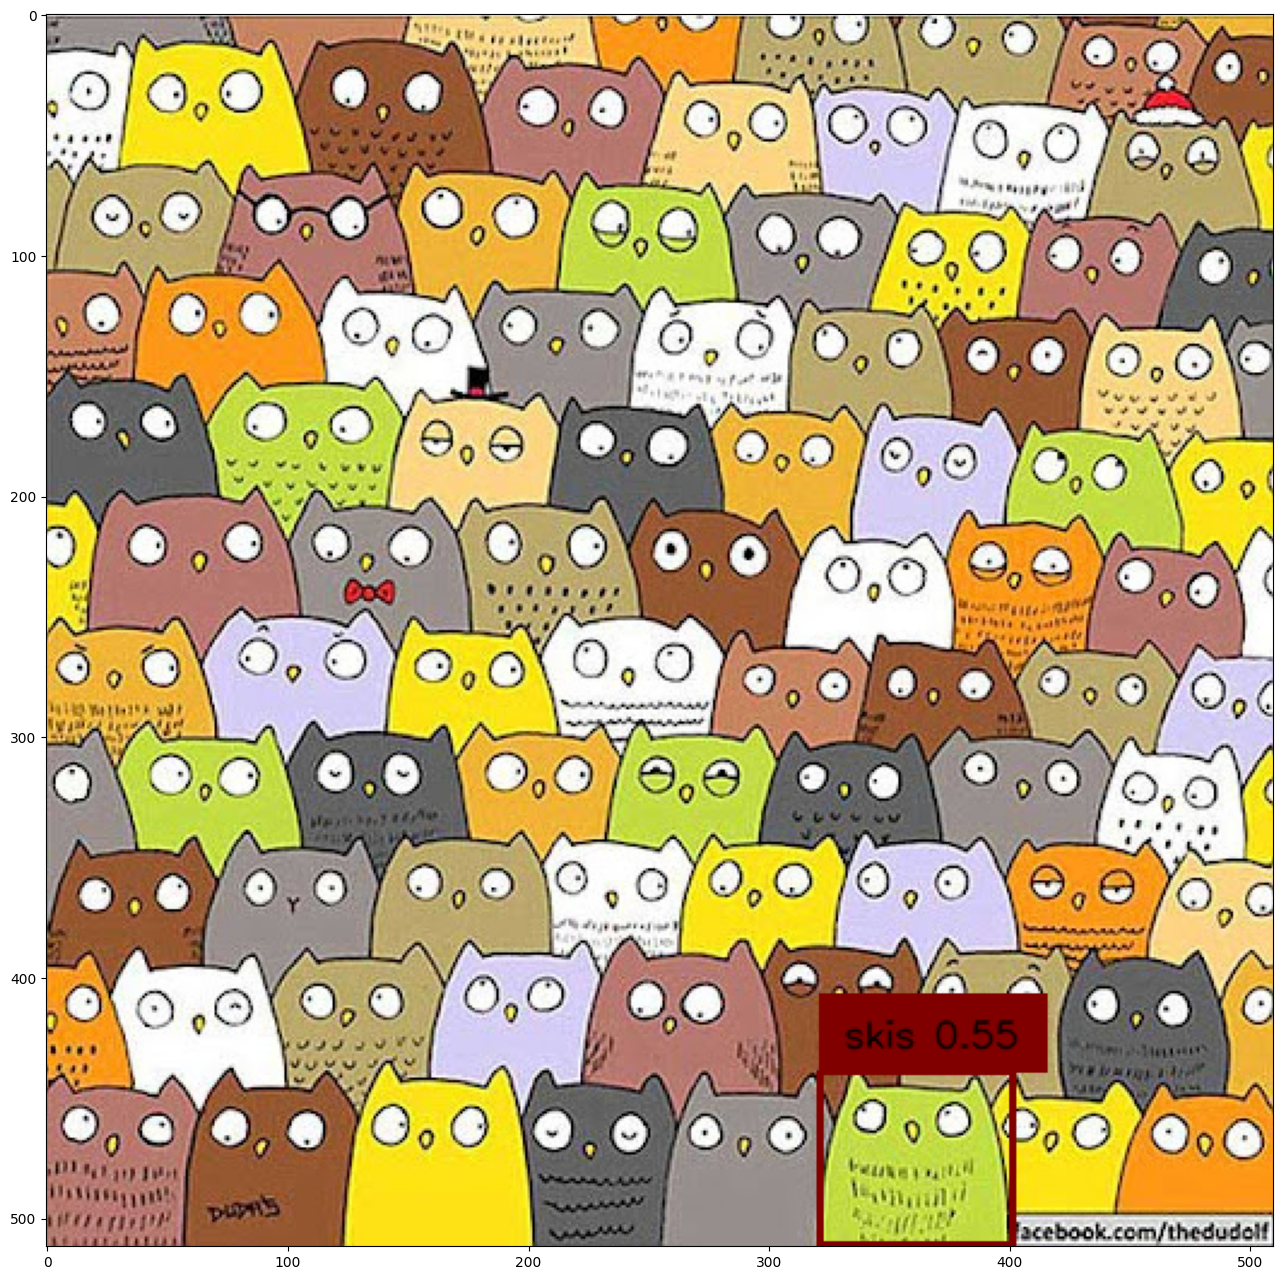

In [11]:
obj_detecting = '/kaggle/input/image-processing-data/Counting/cat.jpg'
import cv2 
frame = cv2.imread(obj_detecting)
result = model(frame)[0]
detection = Detections(xyxy=result.boxes.xyxy.numpy(),
                    confidence=result.boxes.conf.numpy(),
                    class_id=result.boxes.cls.numpy().astype(int))
label = [
    f"{DICT_OBJECT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, track_id in detection 
]
frame_with_name = box_annotator.annotate(frame=frame, detections=detection, labels=label) 
show_frame_in_notebook(frame_with_name, (16, 16))

In [12]:
print(len(detection))

1


In [13]:
mask_filter = result.boxes.conf.numpy() > threshold
print(result.boxes.conf.numpy())
print(len(result.boxes.xyxy.numpy()[mask_filter]))

[    0.54829]
1


In [14]:
from supervision.video.dataclasses import VideoInfo
VideoInfo.from_video_path(VIDEO_SRC)

VideoInfo(width=1280, height=720, fps=30, total_frames=2531)

In [15]:
from supervision.video.sink import VideoSink
from tqdm.notebook import tqdm
FOLDER_TARGET = "/kaggle/working"
video_info = VideoInfo.from_video_path(VIDEO_SRC)
with VideoSink(FOLDER_TARGET, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        result = model(frame)[0]
        detection = Detections(xyxy=result.boxes.xyxy.numpy(),
                            confidence=result.boxes.conf.numpy(),
                            class_id=result.boxes.cls.numpy().astype(int))
        label = [
            f"{DICT_OBJECT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, track_id in detection 
        ]
        result_frame = box_annotator.annotate(frame=frame, detections=detection, labels=label) 
        sink.write_frame(result_frame)

[ WARN:0@25.874] global cap.cpp:643 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.10.0) /io/opencv/modules/videoio/src/cap_images.cpp:430: error: (-215:Assertion failed) !filename_pattern.empty() in function 'open'




  0%|          | 0/2531 [00:00<?, ?it/s]


0: 384x640 9 cars, 1 truck, 1 traffic light, 1874.3ms
Speed: 1.9ms preprocess, 1874.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 truck, 1877.7ms
Speed: 3.3ms preprocess, 1877.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 truck, 1 traffic light, 1883.5ms
Speed: 3.1ms preprocess, 1883.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 truck, 1 traffic light, 1859.9ms
Speed: 4.6ms preprocess, 1859.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 truck, 1 traffic light, 1878.9ms
Speed: 2.8ms preprocess, 1878.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 truck, 1 traffic light, 1902.7ms
Speed: 3.3ms preprocess, 1902.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 truck, 1 traffic light, 1887.7ms
Speed: 2.6ms preprocess, 1887.7ms i